<a href="https://colab.research.google.com/github/PhoniciaAnne/Deep-Learning-/blob/main/ANN_implemetation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x = data.iloc[:,3:13]
y = data.iloc[:,13]

In [ ]:
x


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
#Feature engineering
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
X =x.drop(['Geography','Gender'],axis=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [ ]:
X = pd.concat([X,geography,gender],axis = 1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [ ]:
#splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
 #create Ann
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [ ]:
#initialize ann
classifier = Sequential()


In [ ]:
#adding input layer
classifier.add(Dense(units = 11,activation = 'relu'))


In [ ]:
#adding hidden layer
classifier.add(Dense(units = 7,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
#adding 2 hidden layer
classifier.add(Dense(units=6,activation = 'relu'))

In [ ]:
##adding output layer
classifier.add(Dense(1,activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = opt,loss ='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow
opt =tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
opt

In [ ]:
#early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0001,
    patience=20,
    verbose = 1,
    mode='auto',
    baseline = None,
    restore_best_weights = False,
)



In [ ]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size = 10,epochs=1000,callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3279 - accuracy: 0.8647 - val_loss: 0.3705 - val_accuracy: 0.8535
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3294 - accuracy: 0.8673 - val_loss: 0.3739 - val_accuracy: 0.8527
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.8647 - val_loss: 0.3733 - val_accuracy: 0.8557
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.8647 - val_loss: 0.3785 - val_accuracy: 0.8497
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3264 - accuracy: 0.8660 - val_loss: 0.3692 - val_accuracy: 0.8508
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3239 - accuracy: 0.8701 - val_loss: 0.3802 - val_accuracy: 0.8474
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3255 - accuracy: 0.8651 - val_loss: 0.3791 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

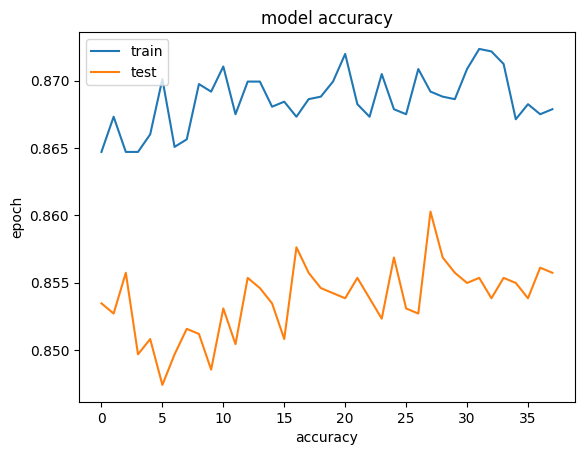

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
#prediction
y_pred = classifier.predict(X_test)
y_pred = (y_pred >=0.5)

63/63 [==============================] - 0s 806us/step


In [ ]:
#make confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1539,   56],
       [ 221,  184]])

In [ ]:
#calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [ ]:
score

0.8645

In [ ]:
#get weights
classifier.get_weights()

[array([[-1.8832204e-01, -9.3184662e-01, -1.7331472e-01, -4.8633003e-01,
          3.7502831e-01,  2.3053277e-01,  2.4086933e-01, -2.7586487e-01,
          1.4702200e+00,  4.1878784e-01,  4.0239316e-01],
        [ 3.6111507e-01, -2.2821522e+00, -2.0228605e-01,  1.4306384e+00,
         -1.9699941e+00,  3.0747342e+00, -1.0410635e+00,  1.1714520e+00,
         -1.0102154e+00, -3.3405323e+00, -1.5193436e-01],
        [ 3.7629467e-01, -6.6018552e-01,  3.2949293e-01,  3.0490878e-01,
          5.5563176e-01, -5.1168305e-01,  8.2511836e-01,  3.1402022e-01,
         -7.3974842e-01, -5.1492250e-01,  4.4710940e-01],
        [ 4.8862359e-01, -3.2923925e-01, -9.2372203e-01, -5.9767091e-01,
         -5.4816917e-02,  8.0503464e-01, -2.2704091e+00, -2.0933945e+00,
         -1.9113560e-01, -5.8606154e-01, -1.8874446e+00],
        [ 3.3342388e+00,  7.2741175e-01, -1.5358588e+00,  2.8768578e-01,
          1.9386137e-01, -9.6161807e-01,  1.7601536e-03, -3.0194790e+00,
         -8.3761317e-01, -7.3280013e-0